# Credit Card Clustering

#### The aim of this project is to determine credit card user demographics via spending patterns. I wish to test and see if cardholders can be grouped into identifiable segments for business and marketing use.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
# Import data
path = './Credit card data/CC General.csv'
cc_data = pd.read_csv(path)

In [4]:
cc_data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [5]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There seem to be some missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS, so let's look into that!

In [6]:
cc_data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [8]:
# Let's impute data for instances with NaN values using the KNNImputer transformer
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(cc_data[num_features]), columns=num_features)

Note that the dataset with imputed values only contains numeric features, leaving out CUST_ID

In [41]:
imp_data.describe().T
# Transpose the data because there are too many columns

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.138560
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.570000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.250000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.000000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.211760
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.500000


# Feature Scaling
#### Let's add a new feature on top of the ones given to us by our dataset

In [37]:
imp_data["Credit Card Utilization Ratio"] = imp_data.BALANCE/imp_data.CREDIT_LIMIT
imp_data['Credit Card Utilization Ratio'].describe()

count    8950.000000
mean        0.388884
std         0.389721
min         0.000000
25%         0.041494
50%         0.302720
75%         0.717571
max        15.909951
Name: Credit Card Utilization Ratio, dtype: float64

#### Let's plot this out

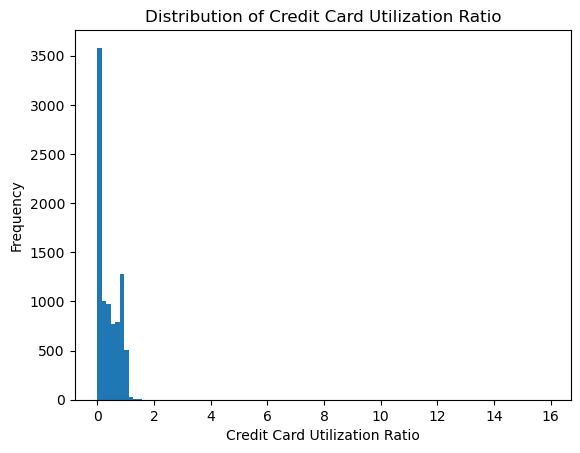

In [35]:
plt.hist(imp_data['Credit Card Utilization Ratio'], bins=100)
plt.title("Distribution of Credit Card Utilization Ratio")
plt.xlabel("Credit Card Utilization Ratio")
plt.ylabel("Frequency")
plt.show()

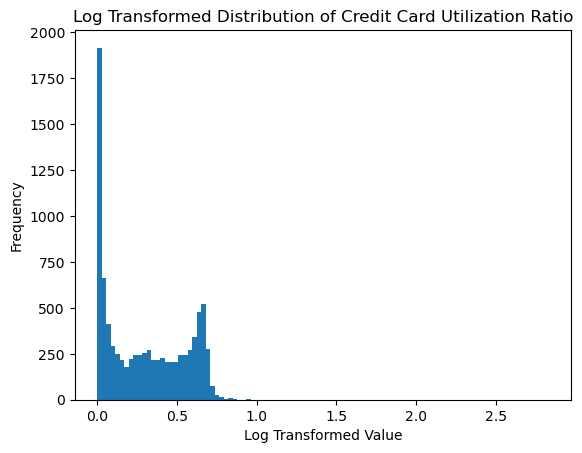

In [36]:
# Apply a log transformation
log_data = np.log1p(imp_data['Credit Card Utilization Ratio'])

# Plot the transformed distribution
plt.hist(log_data, bins=100)
plt.title("Log Transformed Distribution of Credit Card Utilization Ratio")
plt.xlabel("Log Transformed Value")
plt.ylabel("Frequency")
plt.show()

#### The plots and descriptive statistics above show that most cardholders have a utilization ratio below 1.5, but a general average of 0.38. This tells me that while some cardholders spend more than their allocated credit limits, most exhibit restrained purchasing habits. We want to focus on those who have higher credit utilization ratios, because they are more likely to be hit with over-limit fees and potential reductions to their credit scores.

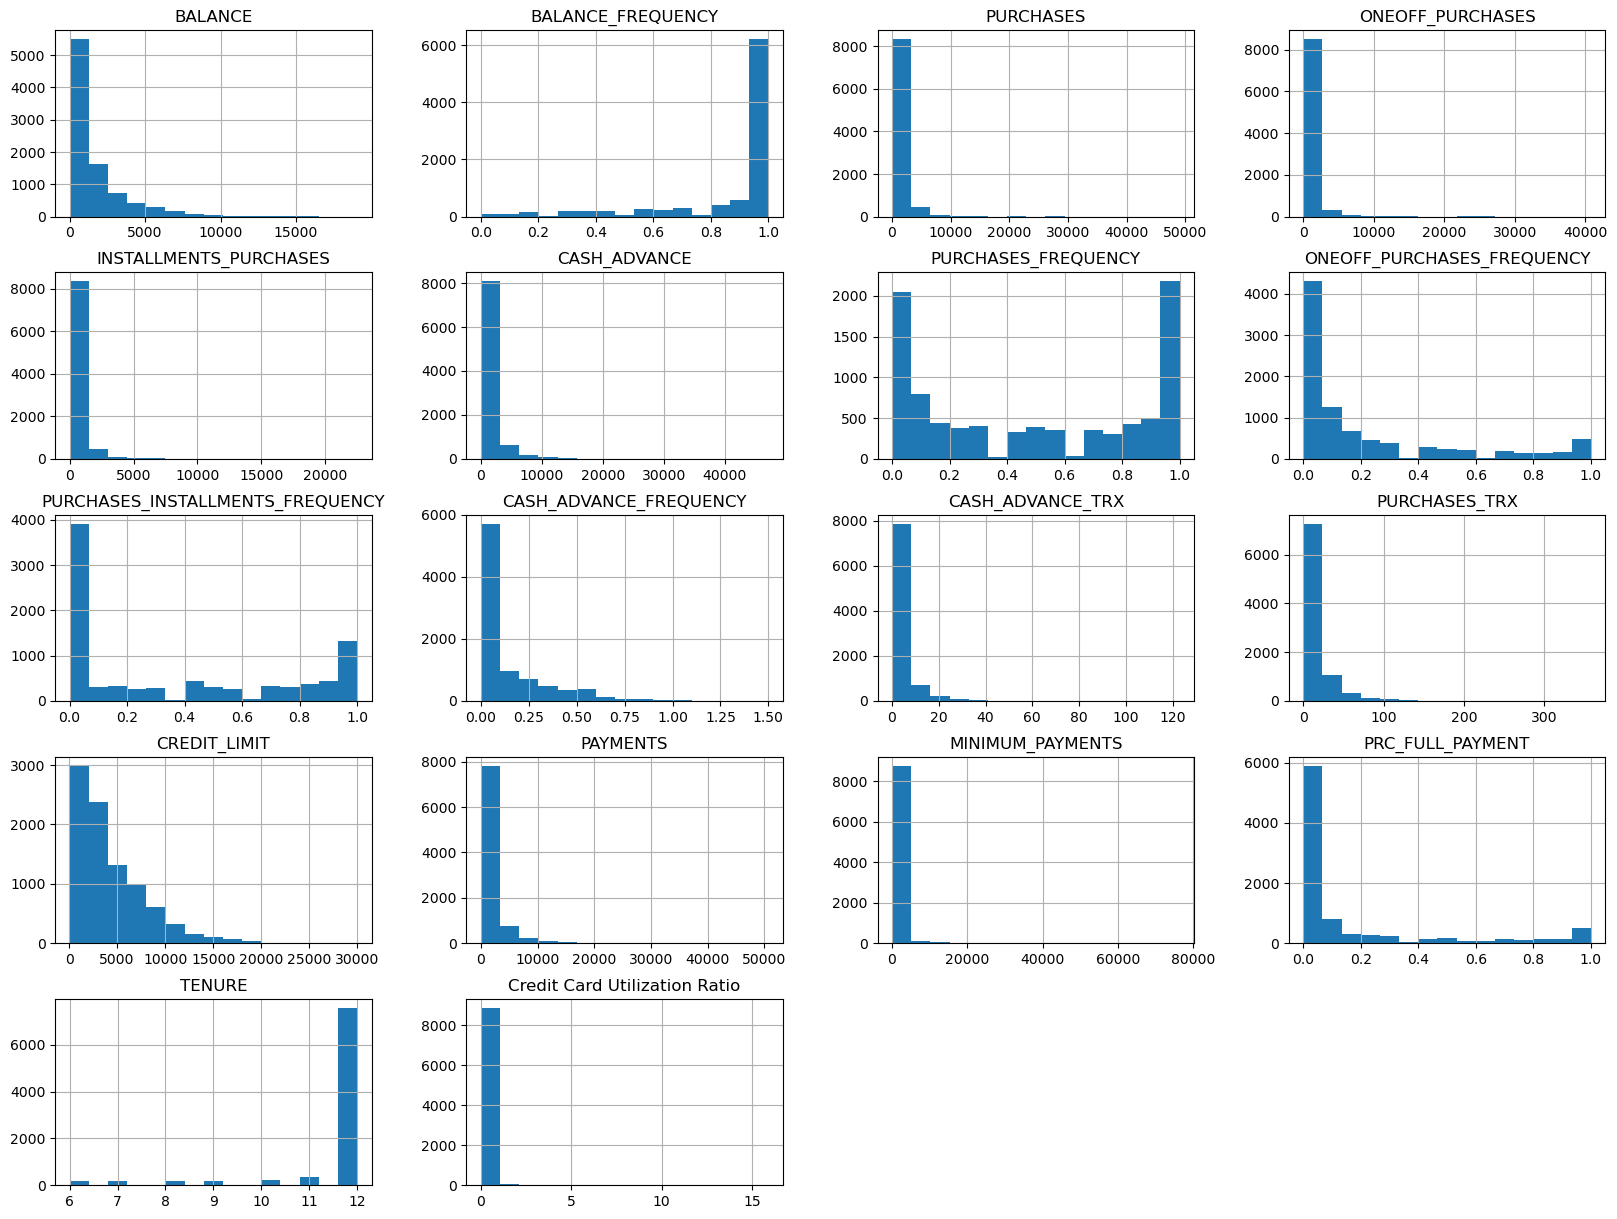

In [46]:
# Pull all numeric features
num_features = imp_data.select_dtypes(include=np.number).columns
# Feature distributions
imp_data[num_features].hist(bins = 15, figsize=(20, 15), layout=(5, 4));

# KMeans

We want to explore some initial features that are meaningful indicators of solvency and liquidity among credit card holders. Some meaningful features include Payments, Balance, and Credit Limit simply because they provide us meaningful information about one's spending habits.

In [51]:
test_data = imp_data[['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']].rename(columns = {'BALANCE': 'Balance', 'PURCHASES': 'Purchases', 'CREDIT_LIMIT': "Credit Limit"})

In [76]:
test_data

,Balance,Purchases,Credit Limit
0,40.900749,95.40,1000.0
1,3202.467416,0.00,7000.0
2,2495.148862,773.17,7500.0
3,1666.670542,1499.00,7500.0
4,817.714335,16.00,1200.0
...,...,...,...
8945,28.493517,291.12,1000.0
8946,19.183215,300.00,1000.0
8947,23.398673,144.40,1000.0
8948,13.457564,0.00,500.0


## Standardization

### We'll need to standardize values with a range between 0 and 1 to normalize variance

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_data = scaler.fit_transform(test_data)

In [101]:
# Let's take a look at the scaled observations
scaled_test_data = pd.DataFrame(scaled_test_data)
scaled_test_data

,0,1,2
0,0.002148,0.001945,0.031720
1,0.168169,0.000000,0.232053
2,0.131026,0.015766,0.248748
3,0.087521,0.030567,0.248748
4,0.042940,0.000326,0.038397
...,...,...,...
8945,0.001496,0.005936,0.031720
8946,0.001007,0.006118,0.031720
8947,0.001229,0.002945,0.031720
8948,0.000707,0.000000,0.015025


In [139]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_test_data) # assign each datapoint to one out of the five clusters

/Users/akilhuang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [112]:
test_data["Clusters"] = cluster_labels
test_data.rename(columns = {0: "Balance", 1: "Purchases", 2: "Credit Limit"}, inplace=True)

Let's rename the clusters to identify them more easily

In [115]:
test_data['Clusters'] = test_data['Clusters'].map({0: "Cluster 1", 1: 
    "Cluster 2", 2: "Cluster 3", 3: "Cluster 4", 4: "Cluster 5"})
test_data

,Balance,Purchases,Credit Limit,Clusters
0,40.900749,95.40,1000.0,Cluster 3
1,3202.467416,0.00,7000.0,Cluster 1
2,2495.148862,773.17,7500.0,Cluster 1
3,1666.670542,1499.00,7500.0,Cluster 2
4,817.714335,16.00,1200.0,Cluster 3
...,...,...,...,...
8945,28.493517,291.12,1000.0,Cluster 3
8946,19.183215,300.00,1000.0,Cluster 3
8947,23.398673,144.40,1000.0,Cluster 3
8948,13.457564,0.00,500.0,Cluster 3


Let's plot the clustering

In [116]:
import plotly.graph_objects as go
PLOT = go.Figure()
for i in list(test_data["Clusters"].unique()):
    

    PLOT.add_trace(go.Scatter3d(x = test_data[test_data["Clusters"]== i]['Balance'],
                                y = test_data[test_data["Clusters"] == i]['Purchases'],
                                z = test_data[test_data["Clusters"] == i]['Credit Limit'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT.update_traces(hovertemplate='BALANCE: %{x} <br>PURCHASES %{y} <br>DCREDIT_LIMIT: %{z}')

    
PLOT.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Balance', titlefont_color = 'black'),
                                yaxis=dict(title = 'Purchases', titlefont_color = 'black'),
                                zaxis=dict(title = 'Credit Limit', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))

# PCA

### It's important that we incorporate all important features within the cluster, and in order to bring the number of dimensions down to 3, I'll apply PCA

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# Create the preprocessing pipeline
cluster_pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 3, random_state=42))
])

In [132]:
# Drop arbitrary customer ID before applying PCA
pca_dataset = cc_data.drop('CUST_ID', axis=1)

I dropped CUST_ID because it is a non-numeric, non-ordinal feature which is assigned rather arbitrarily.

In [133]:
pca_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [164]:
transformed_pca_dataset = cluster_pipeline.fit_transform(pca_dataset)

To determine the optimal number of clusters, I'll use the elbow method

/Users/akilhuang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/akilhuang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/akilhuang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/akilhuang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/akilhuang/anaconda3/lib/python3.10/site-packages/sklearn/

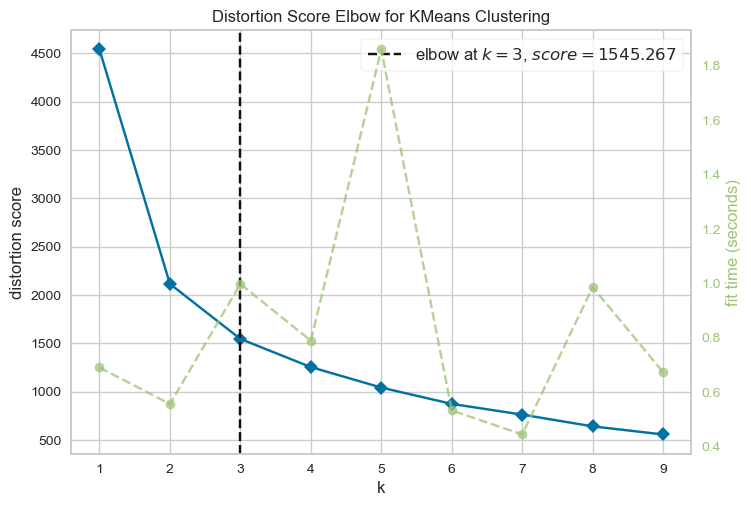

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [140]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(transformed_pca_dataset)
visualizer.show()

In [141]:
# Generate kmeans cluster labels 
kmeans = KMeans(n_clusters = 3, random_state=42) # I've initialized a fresh kmeans object with only 3 clusters
pca_cluster_labels = kmeans.fit_predict(transformed_pca_dataset)

/Users/akilhuang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [165]:
# Let's combine the X and the cluster labels
transformed_pca_dataset = pd.DataFrame(transformed_pca_dataset)
transformed_pca_dataset = pd.concat([transformed_pca_dataset,pd.DataFrame(pca_cluster_labels)], axis=1)

In [170]:
transformed_pca_dataset.columns = ['Dimension 1', 'Dimension 2', 'Dimension 3', 'Clusters']
transformed_pca_dataset

,Dimension 1,Dimension 2,Dimension 3,Clusters
0,-0.482168,-0.097651,-0.046472,0
1,-0.608574,-0.019375,0.082098,0
2,0.304510,0.920927,0.012305,2
3,-0.588621,-0.005631,0.037043,0
4,-0.554357,0.052985,-0.084171,0
...,...,...,...,...
8945,0.646915,-0.463126,0.210294,1
8946,0.549887,-0.406728,-0.214416,1
8947,0.360382,-0.422710,0.105842,1
8948,-0.646101,-0.204428,0.281747,0


In [171]:
PLOT2 = go.Figure()
for i in list(transformed_pca_dataset["Clusters"].unique()):
    

    PLOT2.add_trace(go.Scatter3d(x = transformed_pca_dataset[transformed_pca_dataset["Clusters"]== i]['Dimension 1'],
                                y = transformed_pca_dataset[transformed_pca_dataset["Clusters"] == i]['Dimension 2'],
                                z = transformed_pca_dataset[transformed_pca_dataset["Clusters"] == i]['Dimension 3'],                        
                                mode = 'markers',marker_size = 6, marker_line_width = 1,
                                name = str(i)))
PLOT2.update_traces(hovertemplate='Dimension 1: %{x} <br>Dimension 2 %{y} <br>Dimension 3: %{z}')

    
PLOT2.update_layout(width = 800, height = 800, autosize = True, showlegend = True,
                   scene = dict(xaxis=dict(title = 'Dimension 1', titlefont_color = 'black'),
                                yaxis=dict(title = 'Dimension 2', titlefont_color = 'black'),
                                zaxis=dict(title = 'Dimension 3', titlefont_color = 'black')),
                   font = dict(family = "Gilroy", color  = 'black', size = 12))